In [ ]:
!pip install scikit-learn


In [ ]:
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
encoded_value = le.fit_transform(["paris", "paris", "tokyo", "amsterdam"])
print(encoded_value)

In [ ]:
sales_data['Supplies Subgroup'] = le.fit_transform(sales_data['Supplies Subgroup'])
sales_data['Region'] = le.fit_transform(sales_data['Region'])
sales_data['Route To Market'] = le.fit_transform(sales_data['Route To Market'])
sales_data['Opportunity Result'] = le.fit_transform(sales_data['Opportunity Result'])
sales_data['Competitor Type'] = le.fit_transform(sales_data['Competitor Type'])
sales_data['Supplies Group'] = le.fit_transform(sales_data['Supplies Group'])
#display the initial records
sales_data.head()

In [ ]:
# select columns other than 'Opportunity Number','Opportunity Result'cols = [col for col in sales_data.columns if col not in ['Opportunity Number','Opportunity Result']]
# dropping the 'Opportunity Number'and 'Opportunity Result' columns
data = sales_data[cols]
#assigning the Oppurtunity Result column as target
target = sales_data['Opportunity Result']

In [ ]:
sales_data.columns()

In [ ]:
data = sales_data[sales_data.columns.difference(['Opportunity Number','Opportunity Result'])]
target = sales_data['Opportunity Result']

In [ ]:
data.head(n=2)

In [ ]:
data.shape()

In [ ]:
data.shape

In [ ]:
setsdata_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
setsdata_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)

In [ ]:
# import the necessary module
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#create an object of the type GaussianNB
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(data_train, target_train).predict(data_test)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True)

In [ ]:
# import the necessary module
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#create an object of the type GaussianNB
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(data_train, target_train).predict(data_test)
print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True)

In [ ]:
# import the necessary module
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#create an object of the type GaussianNB
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(data_train, target_train).predict(data_test)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))

In [ ]:
sets data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)

In [ ]:
setsdata_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)

In [ ]:
# import the necessary module
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#create an object of the type GaussianNB
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(setsdata_train, target_train).predict(data_test)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))

In [ ]:
#import the necessary modules
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
#create an object of type LinearSVC
svc_model = LinearSVC(random_state=0)
#train the algorithm on training data and predict using the testing data
pred = svc_model.fit(setsdata_train, target_train).predict(data_test)
#print(pred.tolist())
#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))


In [ ]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=3)
#Train the algorithm
neigh.fit(setsdata_train, target_train)
# predict the response
pred = neigh.predict(data_test)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred))

In [ ]:
!pip install pysyindy

In [ ]:
!pip install pysindy

In [ ]:
import numpy as np

import pysindy as ps

In [ ]:
t = np.linspace(0, 1, 100)
x = 3 * np.exp(-2 * t)
y = 0.5 * np.exp(t)
X = np.stack((x, y), axis=-1)  # First column is x, second is y

In [ ]:
model = ps.SINDy(feature_names=["x", "y"])
model.fit(X, t=t)

In [ ]:
model.print()

In [ ]:
x0 = 6
y0 = -0.1

t_test = np.linspace(0, 1, 100)
x_test = x0 * np.exp(-2 * t_test)
y_test = y0 * np.exp(t_test)

sim = model.simulate([x0, y0], t=t_test)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(x0, y0, "ro", label="Initial condition", alpha=0.6, markersize=8)
ax.plot(x_test, y_test, "b", label="Exact solution", alpha=0.4, linewidth=4)
ax.plot(sim[:, 0], sim[:, 1], "k--", label="SINDy model", linewidth=3)
ax.set(xlabel="x", ylabel="y")
ax.legend()
fig.show()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import rainbow
import numpy as np
from scipy.integrate import odeint
from scipy.io import loadmat

import pysindy as ps

In [ ]:
def f(x, t):
    return [
        -0.1 * x[0] + 2 * x[1],
        -2 * x[0] - 0.1 * x[1]
    ]


dt = 0.01
t_train = np.arange(0, 25, dt)
x0_train = [2, 0]
x_train = odeint(f, x0_train, t_train)

In [ ]:
poly_order = 5
threshold = 0.05

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order),
)
model.fit(x_train, t=dt)
model.print()

In [ ]:
x_sim = model.simulate(x0_train, t_train)
plot_kws = dict(linewidth=2)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(t_train, x_train[:, 0], "r", label="$x_0$", **plot_kws)
axs[0].plot(t_train, x_train[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
axs[0].plot(t_train, x_sim[:, 0], "k--", label="model", **plot_kws)
axs[0].plot(t_train, x_sim[:, 1], "k--")
axs[0].legend()
axs[0].set(xlabel="t", ylabel="$x_k$")

axs[1].plot(x_train[:, 0], x_train[:, 1], "r", label="$x_k$", **plot_kws)
axs[1].plot(x_sim[:, 0], x_sim[:, 1], "k--", label="model", **plot_kws)
axs[1].legend()
axs[1].set(xlabel="$x_1$", ylabel="$x_2$")
fig.show()

In [ ]:
def f(x, t):
    return [
        -0.1 * x[0] + 2 * x[1],
        -2 * x[0] - 0.1 * x[1]
    ]


dt = 0.01
t_train = np.arange(0, 25, dt)
x0_train = [2, 0]
x_train = odeint(f, x0_train, t_train)


In [ ]:
poly_order = 5
threshold = 0.05

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order),
)
model.fit(x_train, t=dt)
model.print()

In [ ]:
x_sim = model.simulate(x0_train, t_train)
plot_kws = dict(linewidth=2)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(t_train, x_train[:, 0], "r", label="$x_0$", **plot_kws)
axs[0].plot(t_train, x_train[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
axs[0].plot(t_train, x_sim[:, 0], "k--", label="model", **plot_kws)
axs[0].plot(t_train, x_sim[:, 1], "k--")
axs[0].legend()
axs[0].set(xlabel="t", ylabel="$x_k$")

axs[1].plot(x_train[:, 0], x_train[:, 1], "r", label="$x_k$", **plot_kws)
axs[1].plot(x_sim[:, 0], x_sim[:, 1], "k--", label="model", **plot_kws)
axs[1].legend()
axs[1].set(xlabel="$x_1$", ylabel="$x_2$")
fig.show()

In [ ]:
def linearODE(x, t):
    return [
        -0.5 * x[0] + 4.5 * x[1],
        -4.5 * x[0] - 0.5 * x[1]
    ]


dt = 0.01
t_train = np.arange(0, 25, dt)
x0_train = [2, 0]
x_train = odeint(f, x0_train, t_train)
#print(x_train)

In [ ]:
poly_order = 5
threshold = 0.05

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order),
)
model.fit(x_train, t=dt)
model.print()

In [ ]:
x_sim = model.simulate(x0_train, t_train)

plot_kws = dict(linewidth=2)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(t_train, x_train[:, 0], "r", label="$x_0$", **plot_kws)
axs[0].plot(t_train, x_train[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
axs[0].plot(t_train, x_sim[:, 0], "k--", label="model", **plot_kws)
axs[0].plot(t_train, x_sim[:, 1], "k--")
axs[0].legend()
axs[0].set(xlabel="t", ylabel="$x_k$")

axs[1].plot(x_train[:, 0], x_train[:, 1], "r", label="$x_k$", **plot_kws)
axs[1].plot(x_sim[:, 0], x_sim[:, 1], "k--", label="model", **plot_kws)
axs[1].legend()
axs[1].set(xlabel="$x_1$", ylabel="$x_2$")
fig.show()

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import rainbow
import numpy as np
from scipy.integrate import odeint
from scipy.io import loadmat

import pysindy as ps

In [ ]:
def get_theta_double_dot(theta,theta_dot):
    return -mu*(g/L)*np.sin(theta)

In [ ]:
def theta(t):
    theta= theta_0
    theta_dot=theta_dot_0
    delta_t=0.01
    for time in np.arange(0, t, delta_t):
        theta_double_dot=get_theta_double_dot(
        theta,theta_dot
        )
        theta+= theta_dot*delta_t
        theta_dot+= theta_double_dot*delta_t
    return [theta,theta_dot] 
    

       

In [ ]:
poly_order = 5
threshold = 0.05

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order),
)
model.fit(theta1, time)
model.print()

In [ ]:
x_sim = model.simulate(initial_cond, time)

def plot_results(time,theta1,x_sim):
	plt.plot(time, x_sim[:,0])
	plt.plot(time, theta1)

	s = '(Initial Angle = ' + str(initial_angle) + ' degrees)'
	plt.title('Pendulum Motion: ' + s)
	plt.xlabel('time (s)')
	plt.ylabel('angle (rad)')
	plt.grid(True)
	plt.legend(['linear', 'model'], loc='lower right')
	plt.show()
    
    
plot_results(time, theta2, x_sim)

In [3]:
import numpy as np 
from numpy import sin, cos
from scipy.integrate import odeint
from matplotlib import pyplot as plt 


# define the equations
def equations(y0, t):
	theta, x = y0
	f = [x, -(g/l) * sin(theta)]
	return f

def plot_results(time,theta2,x_sim):
	plt.plot(time, x_sim[:,0])
	plt.plot(time, theta2)

	s = '(Initial Angle = ' + str(initial_angle) + ' degrees)'
	plt.title('Pendulum Motion: ' + s)
	plt.xlabel('time (s)')
	plt.ylabel('angle (rad)')
	plt.grid(True)
	plt.legend(['nonlinear', 'model'], loc='lower right')
	plt.show()

# parameters
g = 9.81
l = 1.0
dt=0.01

time = np.arange(0, 25, dt)

# initial conditions
initial_angle = 130.0
theta0 = np.radians(initial_angle)
x0 = np.radians(0.0)

# find the solution to the nonlinear problem
theta1 = odeint(equations, [theta0, x0],  time)

# find the solution to the linear problem
#w = np.sqrt(g/l)
#theta2 = [theta0 * cos(w*t) for t in time]

In [ ]:
poly_order = 5
threshold = 0.05

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order),
)
model.fit(theta1, time)
model.print()
xnl_train = [theta0, 0]
x_sim = model.simulate(xnl_train, time)
# plot the results
plot_results(time, theta2, x_sim)

In [ ]:
for i in range(1, t_train.size):
    t = (i - 1) * dt
    y = x0_train
    ys = [x0+noise,x1]

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

num_sims = 5  # Display five runs

t_init = 3
t_end  = 7
N      = 1000  # Compute 1000 grid points
dt     = float(t_end - t_init) / N
y_init = 0

c_theta = 0.7
c_mu    = 1.5
c_sigma = 0.06

def mu(y, t):
    """Implement the Ornstein–Uhlenbeck mu."""  # = \theta (\mu-Y_t)
    return c_theta * (c_mu - y)

def sigma(y, t):
    """Implement the Ornstein–Uhlenbeck sigma."""  # = \sigma
    return c_sigma

def dW(delta_t):
    """Sample a random number at each call."""
    return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))

ts = np.arange(t_init, t_end + dt, dt)
ys = np.zeros(N + 1)

ys[0] = y_init

for i in range(1, ts.size):
    t = (i - 1) * dt
    y = ys[i - 1]
    ys[i] = y + mu(y, t) * dt + sigma(y, t) * dW(dt)

        
plt.plot(ts, ys)
plt.xlabel("time (s)")
h = plt.ylabel("y")
h.set_rotation(0)
plt.show()

In [ ]:
#Params
g = 9.81
l = 1.0
time = np.arange(0, 10.0, 0.025)

#initial conditions
theta0 = 2
x0 = np.radians(0.0)

#Linear
w = np.sqrt(g/l)
theta2 = [theta0 * np.cos(w*t) for t in time]


plt.plot(time, theta2)
plt.xlabel('time (s)')
plt.ylabel('angle (rad)')
plt.show()



In [ ]:
g=-9
l=3
initial_cond=[2.00,0.00]



def dataGen(t):
    theta= initial_cond[0]
    theta_dot=initial_cond[1]
    dt=0.01
    z=np.empty((2500, 2))
    for time in np.arange(0, t, dt):
        i=0
        x=[(theta) + (dt)*(theta_dot) + np.sqrt(dt)*(0.0)*(np.random.randn()),
           theta_dot + (dt)*((-g/l)*theta)]
        theta=z[i][0]
        theta_dot=z[i][1]
        i+=1
        return z
    x_data_noise=dataGen(25)
print(x_data_noise)

plot_kws = dict(linewidth=2)
fig, axs = plt.subplots(1, 2, constrained_layout=True,figsize=(10, 4))
axs[1].plot(x_data_noise[:, 0], x_data_noise[:, 1], 'r-', label="$x_k$", color='r', **plot_kws)
axs[1].set(title='Training data', xlabel='$Angle(theta)$', ylabel='$ Angular Velocity (Omega) $')
axs[1].legend(loc="best")
fig.tight_layout
fig.show()

In [ ]:
#sqrt(dt)*(sigma)*(randn)
#noise = noise_level * np.random.randn(*x_train.shape)
def linearSHM(x, t):
    return [
        -0.2 * x[0] + 3 * x[1],
        -3 * x[0] - 0.2 * x[1]
    ]


dt = 0.01
computations = np.arange(0, 25, dt)
initial_con = [2, 0]
x_data = odeint(linearSHM, initial_con, computations)
print(x_data.shape)

In [ ]:
dt = 0.01
t_train = np.arange(0, 25, dt)
z= [2, 0]

def linearODE(x, t):

      return  [-0.1 * x[0] + 2 * x[1],
               -2 * x[0] - 0.1 * x[1]
              ] 

x_train = odeint(linearODE, z, t_train)
x_train_noisy = x_train + noise_level * np.random.rand(*x_train.shape)
print(x_train)

In [ ]:
rows, cols = (2500, 2) 
arr=[] 
for i in range(cols): 
    col = [] 
    for j in range(rows): 
        col.append(0) 
    arr.append(col) 
print(arr)  
  

In [ ]:
x=[(dt)*(-.2)*theta + (dt)*((3)*theta_dot) + np.sqrt(dt)*(0.0)*(np.random.randn()),
           (dt)*(-.2)*theta_dot + (dt)*((-g/l)*theta)]
        i=0
        z[i][0]=theta
        z[i][1]=theta_dot
        i+=1


In [75]:
g=-9
l=3
initial_cond=[2,0]

def dataGen1(t):
    theta= initial_cond[0]
    theta_dot=initial_cond[1]
    dt=0.01
    x=np.empty([2500, 2])
    for time in np.arange(0, t, dt):
        x0=(-.2)*(theta) + (dt)*(theta_dot) 
        x1=(-.2)*(theta_dot) + (dt)*((-g/l)*theta)
        theta=x0
        theta_dot=x1
        return theta,theta_dot 
        

In [76]:
#np.set_printoptions(formatter={'float_kind':'{:f}'.format})
x_data_noise=dataGen1(25)
print(x_data_noise)

(-0.4, 0.06)


In [1]:
computations = np.arange(0, 25, 0.01)


plot_kws = dict(linewidth=2)
fig, axs = plt.subplots(1, 2, constrained_layout=True,figsize=(10, 4))
axs[0].plot(computations, x_data_noise[:, 0], "r", label="$x_0$", **plot_kws)
axs[0].plot(computations, x_data_noise[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
axs[0].legend(loc="best")
axs[0].set(xlabel="$time (seconds)$", ylabel="$x_k$")

axs[1].plot(x_data_noise[:, 0], x_data_noise[:, 1], 'r-', label="$x_k$", color='r', **plot_kws)
axs[1].set(title='Training data', xlabel='$Angle(theta)$', ylabel='$ Angular Velocity (Omega) $')
axs[1].legend(loc="best")
fig.tight_layout
fig.show()

NameError: name 'np' is not defined

% Usher-McClelland (LCA) model - linear input-output version
% Note the fast dynamics along the phase space diagonal before deciding
% (clue to 1-D approximation of DDM)
% Note also that I have balanced the leak k and inhibition b so that they
% are the same; and that both have high values - these 2 conditions are
% necessary to approximate to DDM


% Model parameters 
S1=4; % Stimulus input amplitude to y1
S2=4; % Stimulus input amplitude to y2
b=7; % Mutual inhibitory coupling strength between the y's
k=7; % Rate of decay of the y's
z=1; % Decision threshold
c=0.1; % Size of the noise


% Initializing the y's
y1(1)=0;
y2(1)=0;

%Define time for the "for" loop
Trial_total=1000 ; % Total number of trial; you should try varying this
T_Total=1000; % Total time
dt=0.1; % Time step

% Starting the trial "for" loop
for i= 1:Trial_total
    
% Starting the time "for" loop
    for t=1:T_Total/dt
        
        y1(t+1)=y1(t)+dt*(-k*y1(t)-b*y2(t)+S1)+ c*sqrt(dt)*randn;
        y2(t+1)=y2(t)+dt*(-k*y2(t)-b*y1(t)+S1)+ c*sqrt(dt)*randn;
        
    end;
    % Plot in phase (y1,y2) space
    plot(y1,y2); title('Trajectory of network in phase space'); 
    xlabel('y_1'); ylabel('y_2'); 
    hold on;
end;

% Check whether total number of correct and error trials adds up to
% Trial_total i.e. consistent
disp('Total number of trials is')
if (size(DTc,2)+size(DTe,2))==Trial_total
    disp('consistent')
end;

% Calculate the accuracy (Divide the number of correct trials with the
% total number of trials
disp('Accuracy')
size(DTc,2)/(size(DTc,2)+size(DTe,2)) % Total number of trials
% Note: Can also be size(DTc,2)/Trial_total

% Display reaction/decision time distributions (good only for large number
% of trials e.g. Trial_total=10000)
figure; hist(DTc,30); title('Correct DT distribution');
figure; hist(DTe,30); title('Error DT distribution')

# parameters
lam = 0.9
T = 25      # total Time duration in steps
x0 = 2     # initial condition of x at time 0
y0= 0 
dt=0.01

# initiatialize variables
t = np.arange(0, T, dt)
x = np.zeros_like(t)
y = np.zeros_like(t)
x[0] = x0
y[0] = y0

# Step through in time
for k in range(len(t)-1):
    x[k+1] = lam * x[k] + (dt)* -y[k]
    y[k+1] = y[k]*dt+ dt*-3*x[k]

# plot x as it evolves in time
fig = plt.figure()
plt.title('$\lambda=%0.1f$' % lam, fontsize=16)
plt.plot(t, x0 * lam**t, 'r') # analytic solution
plt.plot(t, x, 'b-')          # simulated data pts
plt.ylim(0, x0+1)

plt.xlabel('t')
plt.ylabel('x')
plt.show()

# parameters
lam = 0.9
T = 25      # total Time duration in steps
x0 = 2     # initial condition of x at time 0
y0= 0 
dt=0.01

# initiatialize variables
t = np.arange(0, T, dt)
x = np.zeros_like(t)
y = np.zeros_like(t)
x[0] = x0
y[0] = y0

# Step through in time
for k in range(len(t)-1):
    x[k+1] = dt* x[k] + lam *dt* -y[k]
    y[k+1] = -y[k]*dt+ dt*-3*x[k]
    print(x[k],y[k])
    


g=9        #gravity aprrox
l=3         #pendulum length
lam = 0.2   #decay 
c = 0.5    #noise
T = 25      #total Time duration in steps
x0 = 2     #initial condition of x at time 0
y0= 0      #initial condition of y at time 0
dt=0.01    #timestep

# initiatialize variables
t = np.arange(0, T, dt)
x = np.zeros_like(t)
y = np.zeros_like(t)
x[0] = x0  #theta
y[0] = y0  #theta_dot

# Step through in time
for k in range(len(t)-1):
    x[k+1] = x[k]+dt*(-lam*x[k] + 3*y[k]) + np.sqrt(dt)*(c)*(np.random.randn())
    y[k+1] = y[k]+dt*(-lam*y[k] + (-g/l)*x[k])
    #print(x[k],y[k])

    
#fit to array    
x_data_1= np.vstack((x, y)).T
print(x_data_1)

In [60]:
poly_order = 1
threshold = 0.01

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order),
)
model.fit(x_data_1, t=dt)
model.print()

x0' = 0.027 1 + 0.072 x0 + 3.033 x1
x1' = -2.999 x0 + -0.154 x1


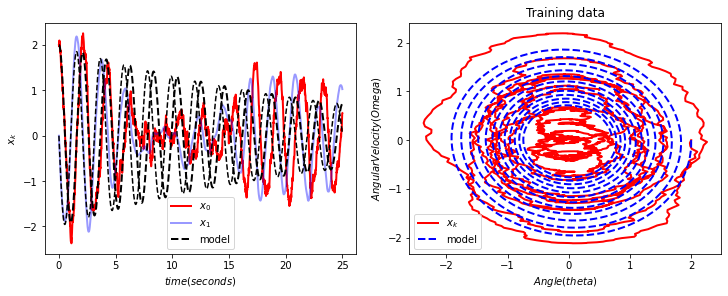

In [61]:
initial_con_1 = [2,0]
x_sim = model.simulate(initial_con_1, t)


plot_kws = dict(linewidth=2)
fig, axs = plt.subplots(1, 2, constrained_layout=True,figsize=(10, 4))
axs[0].plot(t, x_data_1[:, 0], "r", label="$x_0$", **plot_kws)
axs[0].plot(t, x_data_1[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
axs[0].plot(t, x_sim[:, 0], "k--", label="model", **plot_kws)
axs[0].plot(t, x_sim[:, 1], "k--")
axs[0].legend(loc="best")
axs[0].set(xlabel="$time (seconds)$", ylabel="$x_k$")

axs[1].plot(x_data_1[:, 0], x_data_1[:, 1], 'r-', label="$x_k$", color='r', **plot_kws)
axs[1].plot(x_sim[:, 0], x_sim[:, 1], 'b--', label="model", color='b', **plot_kws)
axs[1].set(title='Training data', xlabel='$Angle(theta)$', ylabel='$ Angular Velocity (Omega) $')
axs[1].legend(loc="best")
fig.tight_layout
fig.show()

In [43]:
 #+ "c * np.random.standard_normal(size=1)" or

In [453]:
#noise + "c * np.random.standard_normal(size=1)" or "np.sqrt(dt)*(c)*(np.random.randn())"
g=9        #gravity aprrox
l=3         #pendulum length
lam = 0.2   #decay 
c = 0    #noise
T = 25      #total Time duration in steps
x0 = 2     #initial condition of x at time 0
y0= 0      #initial condition of y at time 0
dt=0.01    #timestep

# initiatialize variables
t = np.arange(0, T, dt)
x = np.zeros_like(t)
y = np.zeros_like(t)
x[0] = x0  #theta
y[0] = y0  #theta_dot

#Sindy
poly_order = 1
threshold = .105
smoothed_fd=ps.SmoothedFiniteDifference()
#fd_drop_endpoints = ps.FiniteDifference(drop_endpoints=True)

def getData():
    # Step through in time
    for k in range(len(t)-1):
        x[k+1] = x[k]+dt*(-lam*x[k] + 3*y[k]) + np.sqrt(dt)*(c)*(np.random.randn())
        y[k+1] = y[k]+dt*(-lam*y[k] + (-g/l)*x[k])
        #print(x[k],y[k])   
    #fit to array    
    x_data= np.vstack((x, y)).T
    return x_data;



def getModel(data):
    modelv1 = ps.SINDy(
        optimizer=ps.STLSQ(threshold=threshold),
        feature_library=ps.PolynomialLibrary(degree=poly_order),
        differentiation_method=smoothed_fd,
    )
    modelv1.fit(data, t=dt)
    modelv1.print()





In [454]:
x_data_1=getData()
x_data_2=getData()
x_data_3=getData()
x_data_4=getData()
x_data_5=getData()
x_data_6=getData()
x_data_7=getData()
x_data_8=getData()
x_data_9=getData()
x_data_10=getData()
x_total=(x_data_1+x_data_2+x_data_3+x_data_4+x_data_5+x_data_6+x_data_7+x_data_8+x_data_9+x_data_10)
x_avg=np.true_divide(x_total, 10)
#print(x_avg)

In [455]:
avg=getModel(x_avg)

x0' = -0.155 x0 + 3.005 x1
x1' = -3.005 x0 + -0.155 x1


In [449]:
Model_1=getModel(x_data_1)
print("")
Model_2=getModel(x_data_2)
print("")
Model_3=getModel(x_data_3)
print("")
Model_4=getModel(x_data_4)
print("")
Model_5=getModel(x_data_5)
print("")
Model_6=getModel(x_data_6)
print("")
Model_7=getModel(x_data_7)
print("")
Model_8=getModel(x_data_8)
print("")
Model_9=getModel(x_data_9)
print("")
Model_10=getModel(x_data_10)
print("")
avg=getModel(x_avg)

x0' = -0.155 x0 + 3.005 x1
x1' = -3.005 x0 + -0.155 x1

x0' = -0.155 x0 + 3.005 x1
x1' = -3.005 x0 + -0.155 x1

x0' = -0.155 x0 + 3.005 x1
x1' = -3.005 x0 + -0.155 x1

x0' = -0.155 x0 + 3.005 x1
x1' = -3.005 x0 + -0.155 x1

x0' = -0.155 x0 + 3.005 x1
x1' = -3.005 x0 + -0.155 x1

x0' = -0.155 x0 + 3.005 x1
x1' = -3.005 x0 + -0.155 x1

x0' = -0.155 x0 + 3.005 x1
x1' = -3.005 x0 + -0.155 x1

x0' = -0.155 x0 + 3.005 x1
x1' = -3.005 x0 + -0.155 x1

x0' = -0.155 x0 + 3.005 x1
x1' = -3.005 x0 + -0.155 x1

x0' = -0.155 x0 + 3.005 x1
x1' = -3.005 x0 + -0.155 x1

x0' = -0.155 x0 + 3.005 x1
x1' = -3.005 x0 + -0.155 x1


NameError: name 't' is not defined

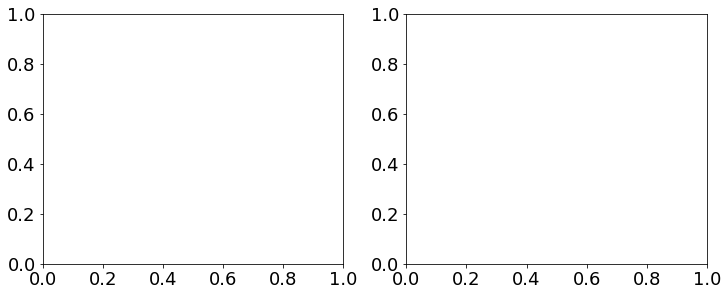

In [47]:

plot_kws = dict(linewidth=2)

fig, axs = plt.subplots(1, 2, constrained_layout=True,figsize=(10, 4))
axs[0].plot(t, x_avg[:, 0], "r", label="$x_0$", **plot_kws)
axs[0].plot(t, x_avg[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
axs[0].legend(loc="best")
axs[0].set(xlabel="$time (seconds)$", ylabel="$x_k$")
fig.show()

In [2]:
import numpy as np
import sdeint

A = np.array([[-0.2, 3],
              [ -3, -0.2]])

B = np.diag([np.sqrt(0.1)*(1)*(np.random.randn()), np.sqrt(0.1)*(1)*(np.random.randn())]) # diagonal, so independent driving Wiener processes

tspan = np.linspace(0.0, 25, 2500)
x0 = np.array([2., 0])

def f(x, t):
    return A.dot(x)

def G(x, t):
    return B

result = sdeint.itoint(f, G, x0, tspan)
plt.plot(result)
plt.show()

NameError: name 'plt' is not defined

ValueError: x and y must have same first dimension, but have shapes (5,) and (4,)

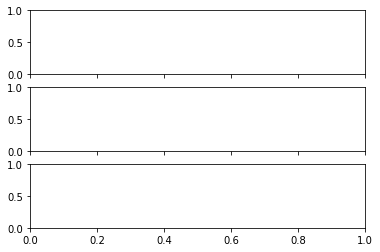

In [496]:
# if using a Jupyter notebook, include:


t = [0,0.25,0.5,0.75,1.0]

s1 = [-.2,3,-3,-.2]
s2 = [-.2,3,-3,-.2]
s3 = [-.2,3,-3,-.2]

fig, axs = plt.subplots(3, 1, sharex=True)


# Plot each graph, and manually set the y tick values
axs[0].plot(t, s1)
#axs[0].set_yticks(np.arange(-0.9, 1.0, 0.4))
#axs[0].set_ylim(-1, 1)

axs[1].plot(t, s2)
#axs[1].set_yticks(np.arange(0.1, 1.0, 0.2))
#axs[1].set_ylim(0, 1)

axs[2].plot(t, s3)
#axs[2].set_yticks(np.arange(-0.9, 1.0, 0.4))
#axs[2].set_ylim(-1, 1)

plt.show()

ValueError: x and y must have same first dimension, but have shapes (5,) and (1,)

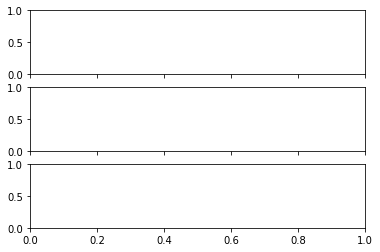

In [503]:
t = (0.0, 0.25, 0.5,0.75,1)

s1 = 1
s2 =1
s3 = 1

fig, axs = plt.subplots(3, 1, sharex=True)


# Plot each graph, and manually set the y tick values
axs[0].plot(t, s1)
axs[0].set_yticks(np.arange(-0.9, 1.0, 0.4))
axs[0].set_ylim(-1, 1)

axs[1].plot(t, s2)
axs[1].set_yticks(np.arange(0.1, 1.0, 0.2))
axs[1].set_ylim(0, 1)

axs[2].plot(t, s3)
axs[2].set_yticks(np.arange(-0.9, 1.0, 0.4))
axs[2].set_ylim(-1, 1)

axs[2].set_xlabel("Noise")
plt.show()

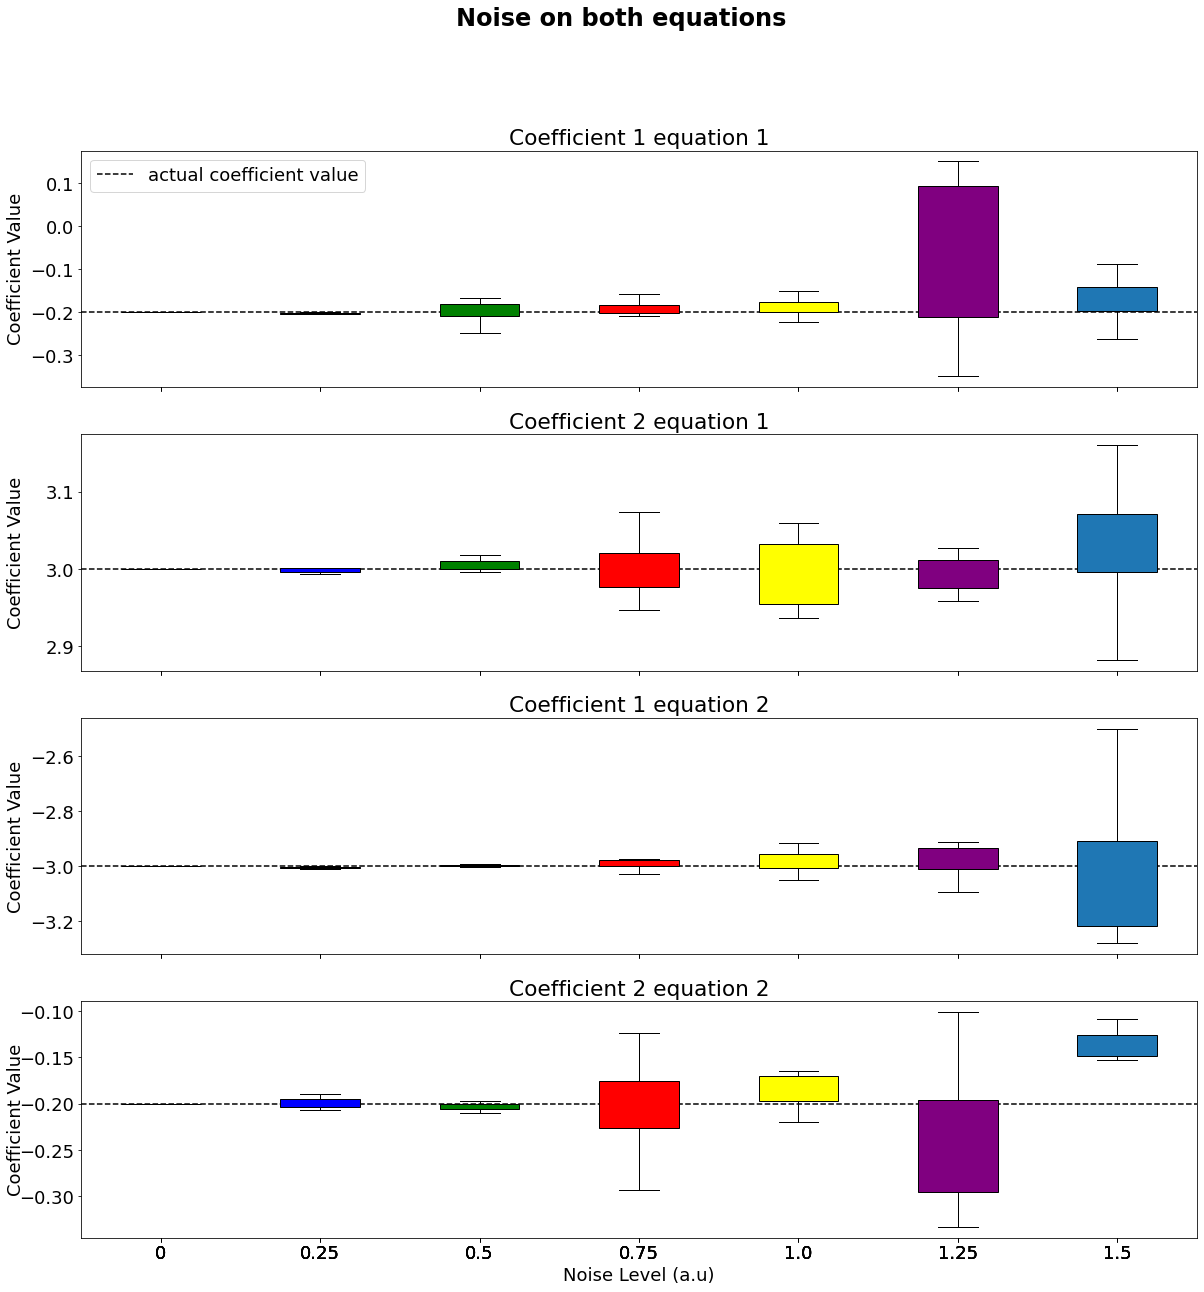

In [8]:
#coeff_1_eqn_1
eqn1_0 = np.random.normal(-0.2, 0.0, 10)
eqn1_n1 = np.random.normal(-0.2008, 0.006, 10)
eqn1_n2 = np.random.normal(-0.1998, 0.0295, 10)
eqn1_n3 = np.random.normal(-0.1963, 0.0162, 10)
eqn1_n4 = np.random.normal(-.1651, 0.0360, 10)
eqn1_n5 =np.random.normal(-0.1654, 0.297,10)
eqn1_n6 =np.random.normal(-.1633,.0654,10)
coeff_1_eqn_1=[eqn1_0, eqn1_n1, eqn1_n2, eqn1_n3,eqn1_n4,eqn1_n5, eqn1_n6]

#coeff_2_eqn_1
eqn1a_0 = np.random.normal(3, 0.0, 100)
eqn1a_n1 = np.random.normal(2.999, 0.0052, 10)
eqn1a_n2 = np.random.normal(3.003, 0.0095, 10)
eqn1a_n3 = np.random.normal(3.0041, 0.0281, 10)
eqn1a_n4 = np.random.normal(3.006, 0.0439, 10)
eqn1a_n5 =np.random.normal(2.9817,0.0393,10)
eqn1a_n6 =np.random.normal(2.9893,0.0769,10)
coeff_2_eqn_1=[eqn1a_0, eqn1a_n1, eqn1a_n2, eqn1a_n3,eqn1a_n4,eqn1a_n5, eqn1a_n6 ]

#coeff_1_eqn_2
eqn2_0 = np.random.normal(-3, 0.0, 100)
eqn2_n1 = np.random.normal(-3.001, 0.0032, 10)
eqn2_n2 = np.random.normal(-2.9997, 0.0053, 10)
eqn2_n3 = np.random.normal(-2.9881, 0.0285, 10)
eqn2_n4 = np.random.normal(-2.986, 0.0389, 10)
eqn2_n5 =np.random.normal(-2.964,0.0804,10)
eqn2_n6 =np.random.normal(-3.0609,0.1149,10)
coeff_1_eqn_2=[eqn2_0 , eqn2_n1, eqn2_n2, eqn2_n3,eqn2_n4, eqn2_n5, eqn2_n6 ]

#coeff_2_eqn_2
eqn2a_0 = np.random.normal(-0.2, 0.0, 10)
eqn2a_n1= np.random.normal(-0.2, 0.0045, 10)
eqn2a_n2= np.random.normal(-0.201, 0.0065, 10)
eqn2a_n3 = np.random.normal(-0.1859, 0.0512, 10)
eqn2a_n4 = np.random.normal(-0.1725, 0.0311, 10)
eqn2a_n5 = np.random.normal(-.1859, 0.0678, 10)
eqn2a_n6 =np.random.normal(-0.1341, 0.0252, 10)
coeff_2_eqn_2=[eqn2a_0 , eqn2a_n1, eqn2a_n2, eqn2a_n3, eqn2a_n4, eqn2a_n5, eqn2a_n6 ]

labels = ['0','0.25', '0.5', '0.75', '1.0','1.25','1.5']
medianprops = dict(linewidth=0)


fig, (ax1, ax2,ax3,ax4) = plt.subplots(nrows=4, ncols=1, figsize=(20, 20),  sharex=True)

# rectangular box plot
bplot1 = ax1.boxplot(coeff_1_eqn_1,0,'',
                     vert=True,  # vertical box alignment
                     medianprops=medianprops, #remove median
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.axhline(y=-0.2,linestyle="dashed", color="black", label="actual coefficient value")
ax1.set_title('Coefficient 1 equation 1')


bplot2 = ax2.boxplot(coeff_2_eqn_1,0,'',
                     vert=True,  # vertical box alignment
                     medianprops=medianprops,#remove median
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax2.axhline(y=3.0,linestyle="dashed", color="black")
ax2.set_title('Coefficient 2 equation 1')

bplot3 = ax3.boxplot(coeff_1_eqn_2,0,'',
                     vert=True,  # vertical box alignment
                     medianprops=medianprops,#remove median
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax3.axhline(y=-3.0,linestyle="dashed", color="black")
ax3.set_title('Coefficient 1 equation 2')

bplot4 = ax4.boxplot(coeff_2_eqn_2,0,'',
                     vert=True,  # vertical box alignment
                     medianprops=medianprops,#remove median
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax4.axhline(y=-0.2,linestyle="dashed", color="black")
ax4.set_title('Coefficient 2 equation 2')

# fill with colors
colors = ['pink', 'blue', 'green','red', 'yellow','purple']
for bplot in (bplot1, bplot2,bplot3,bplot4):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2,ax3,ax4]:
    ax.set_ylabel('Coefficient Value')
    ax.yaxis.set_label_coords(-0.05, 0.5)


plt.rcParams.update({'font.size': 18})    
ax1.legend(loc="best")
ax4.set_xlabel('Noise Level (a.u)')
fig.suptitle('Noise on both equations',fontsize=24, fontweight='bold')
plt.show()


In [ ]:
#y2=[]
#with open('umdataY2.txt', newline = '') as texts:
 #   number2=[]
  #  text_reader = csv.reader(texts, delimiter='\t')
##    for number2 in text_reader:
#        print(number2)
        
#y2=[float(i) for i in number2]
#         x[p+1] = x[p]+dt*(-k*x[p]-(b*((1.+np.exp(-4*(y[p]-.5)))**-1))+S1) + c*np.sqrt(dt)*np.random.randn()
#         y[p+1] =y[p]+dt*(-k*y[p]-(b*((1.+np.exp(-4*(x[p]-.5)))**-1))+S2) + c*np.sqrt(dt)*np.random.randn()